In [1]:
from segment_anything import SamPredictor, sam_model_registry, SamAutomaticMaskGenerator
import torch
from super_gradients.training import models
import cv2
from PIL import Image
import numpy as np

/home/suchira/anaconda3/envs/sam/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The console stream is logged into /home/suchira/sg_logs/console.log


[2023-12-31 07:56:37] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-12-31 07:56:38] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-12-31 07:56:49] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-12-31 07:56:49] WARNING - export.py - Failed to import pytorch_quantization
[2023-12-31 07:56:49] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization


In [2]:
def draw_masks_fromDict(image, masks_generated) :
  masked_image = image.copy()
  for i in range(len(masks_generated)) :
    masked_image = np.where(np.repeat(masks_generated[i]['segmentation'].astype(int)[:, :, np.newaxis], 3, axis=2),
                            np.random.choice(range(256), size=3),
                            masked_image)

    masked_image = masked_image.astype(np.uint8)

  return cv2.addWeighted(image, 0.3, masked_image, 0.7, 0)

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
sam = sam_model_registry["vit_b"](checkpoint="checkpoints/sam_vit_b_01ec64.pth").to(device=device)

In [29]:
img_path = "data/75.jpg"

In [30]:
predictor = SamAutomaticMaskGenerator(sam)

In [31]:
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [32]:
masks = predictor.generate(image=image)

In [33]:
masks

[{'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [ True,  True,  True, ..., False, False, False],
         [ True,  True,  True, ..., False, False, False],
         [ True,  True,  True, ..., False, False, False]]),
  'area': 4648,
  'bbox': [0, 914, 82, 109],
  'predicted_iou': 1.0127770900726318,
  'point_coords': [[16.0, 1008.0]],
  'stability_score': 0.9875909090042114,
  'crop_box': [0, 0, 1024, 1024]},
 {'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 33694,
  'bbox': [302, 470, 254, 1

In [34]:
len(masks)

38

In [35]:
segmented_image = draw_masks_fromDict(image=image, masks_generated=masks)

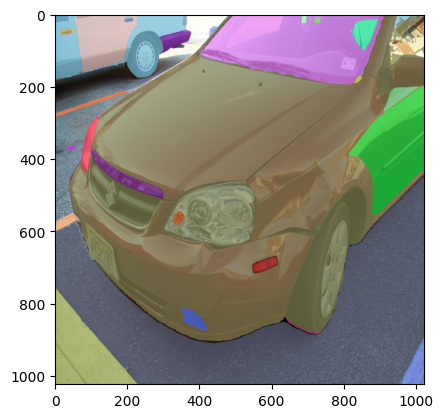

In [36]:
from matplotlib import pyplot as plt
plt.imshow(segmented_image)

In [13]:
model = models.get("yolo_nas_s", pretrained_weights="coco").to(device)

[2023-12-31 07:56:58] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2023-12-31 07:56:58] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_s


In [14]:
	
out = model.predict(image, conf=0.6)

[2023-12-31 07:56:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


In [15]:
predictions = out._images_prediction_lst[0].prediction

In [16]:
class_names = out._images_prediction_lst[0].class_names
print("class names = ", class_names)

In [17]:
print(f"Predictions = {predictions}")

In [18]:
bboxes = predictions.bboxes_xyxy
labels = predictions.labels
classes = [class_names[int(label)] for label in labels]

In [19]:
classes

[]

In [20]:
bboxes.astype(int)

array([], shape=(0, 4), dtype=int64)

class names =  ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
Predictions = DetectionPrediction(bboxes_xyxy=array([], shape=(0, 4), dtype=float32), confidence=array([], dtype=float16), 